# 순환 신경망으로 IMDB 리뷰 분류하기

* 필요한 라이브러리 임포트

In [55]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras


#### 토큰에 부여되는 특수 정수
- 0: 패딩
- 1: 문장의 시작
- 2: 어휘 사전에 없는 토큰

## IMDB 리뷰 데이터셋

In [3]:
# 빈도수가 가장 많은 500개 데이터만 로드하기
from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

17464789/17464789 [==============================] - 1s 0us/step


In [12]:
# 훈련세트, 테스트 세트 크기 확인
train_input.shape, test_input.shape

((25000,), (25000,))

In [13]:
# 첫 번째 리뷰의 길이 출력
len(train_input[0])


218

In [14]:
# 두 번째 리뷰의 길이 출력
len(train_input[1])

189

In [16]:
# 첫 번째 리뷰에 담긴 내용과 레이블 확인
print(train_input[0])
print("-"*50)
print(train_target[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
--------------------------------------------------
1


In [17]:
# 타겟 데이터 확인 긍정:1  부정: 0
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [18]:
# 훈련 세트와 검증 세트 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_input, train_target,
                                                                     test_size=0.2,
                                                                       random_state=42)

In [26]:
# 훈련 세트의 각 리뷰별 단어 길이 확인 및 평균 , 중간값 확인
print(X_train.shape, X_val.shape)

length = []
for each in X_train:
    length.append(len(each))

length[:20]

(20000,) (5000,)


[259,
 520,
 290,
 109,
 559,
 96,
 130,
 935,
 383,
 716,
 195,
 55,
 122,
 142,
 104,
 109,
 179,
 777,
 368,
 311]

In [ ]:
#### 리스트 컨프리헨션으로 표현
length = np.array([len(each) for each in X_train])
length[:20]

In [27]:
# 리뷰 길이 데이터의 분포 확인
np.mean(length), np.median(length)

(239.00925, 178.0)

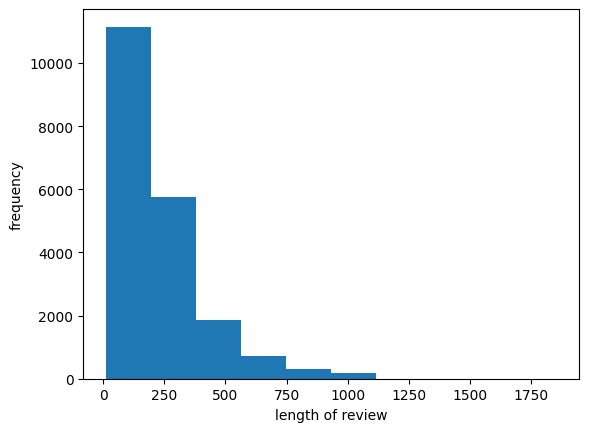

In [28]:
import matplotlib.pyplot as plt

plt.hist(length)
plt.xlabel('length of review')
plt.ylabel('frequency')
plt.show()

### 리뷰의 길이를 일정하게 조정 - pad_sequence()

In [40]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(X_train, maxlen=100)


In [41]:
train_seq.shape

(20000, 100)

In [42]:
train_seq[0]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
       451,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10, 470, 158], dtype=int32)

In [34]:
print(X_train[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [35]:
val_seq = pad_sequences(X_val, maxlen=100)

# 순환 신경망 만들기

## 1) Model1 : One-Hot Encoding을 사용하여 RNN 입력 시퀀스 구성한 경우

In [43]:
# One-Hot Encoding
train_oh = keras.utils.to_categorical(train_seq)

In [44]:
val_oh = keras.utils.to_categorical(val_seq)

In [45]:
#원핫 인코딩이 잘 된 상태
train_oh.shape

(20000, 100, 500)

In [ ]:
train_oh[0][0]

In [39]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [50]:
model = keras.Sequential([
    SimpleRNN(8, input_shape=(100, 500)),
    Dense(1, activation='sigmoid')
])

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [61]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

rmsprop = RMSprop(learning_rate=1e-4)
model.compile(loss='binary_crossentropy', metrics='accuracy', optimizer=rmsprop)

In [63]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('../data/320.0.best_simpleRNN.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

hist = model.fit(train_oh, y_train, epochs=100, batch_size=64,
                 validation_data= (val_oh, y_val),
                 callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


2023-03-02 11:17:27.036252: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-02 11:17:27.747579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5007

2023-03-02 11:30:02.459980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 786s 3s/step - loss: 0.6933 - accuracy: 0.5007 - val_loss: 0.7042 - val_accuracy: 0.5004
Epoch 2/100
313/313 [==============================] - 793s 3s/step - loss: 0.6932 - accuracy: 0.5028 - val_loss: 0.7040 - val_accuracy: 0.4996
Epoch 3/100
313/313 [==============================] - 794s 3s/step - loss: 0.6931 - accuracy: 0.5032 - val_loss: 0.7044 - val_accuracy: 0.4994
Epoch 4/100
243/313 [======================>.......] - ETA: 2:50 - loss: 0.6933 - accuracy: 0.4963

KeyboardInterrupt: 

In [62]:
model.save('../data/320.0.best_simpleRNN.h5')

In [ ]:
model = tf.keras.models.load_model('../data/320.0.best_simpleRNN.h5')

In [ ]:
df = pd.DataFrame(hist.history)

# loss값 시각화
plt.figure(figsize=(6,6))
plt.plot(df.loss, label='train_loss')
plt.plot(df.val_loss,label='val_loss')
plt.legend()
plt.show()

# accuracy값 시각화
plt.figure(figsize=(6,6))
plt.plot(df.accuracy, label='train_accuray')
plt.plot(df.val_accuracy,label='val_accuracy')
plt.legend()
plt.show()

## 2) Model2. 단어 임베딩을 사용하여 RNN 입력 시퀀스 구성한 경우
- 각각의 단어(토큰)를 고정된 크기의 실수 벡터로 변환
- keras.layers.Embedding 클래스 활용

In [64]:
from keras.layers import Embedding

model_emd = keras.Sequential([
    Embedding(500, 16, input_length=100),
    SimpleRNN(8),
    Dense(1, activation='sigmoid')
])

In [65]:
model_emd.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [67]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

rmsprop = RMSprop(learning_rate=1e-4)
model_emd.compile(loss='binary_crossentropy', metrics='accuracy', optimizer=rmsprop)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('../data/320.0.best_embRNN.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

hist = model_emd.fit(train_seq, y_train, epochs=3, batch_size=64,
                 validation_data= (val_seq, y_val),
                 callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/3


2023-03-02 12:07:59.615087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 0.6950 - accuracy: 0.5095

2023-03-02 12:30:55.863300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1406s 4s/step - loss: 0.6950 - accuracy: 0.5095 - val_loss: 0.6938 - val_accuracy: 0.5100
Epoch 2/3
313/313 [==============================] - 3316s 11s/step - loss: 0.6906 - accuracy: 0.5295 - val_loss: 0.6921 - val_accuracy: 0.5132
Epoch 3/3
313/313 [==============================] - 1427s 5s/step - loss: 0.6870 - accuracy: 0.5483 - val_loss: 0.6909 - val_accuracy: 0.5210


# LSTM RNN으로 IMDB  텍스트 분류

## RNN 순환층에 DropOut 적용하기

## 2개의 RNN층이 연결된 모델 구현하기

# GRU 모델 구현하기